<a href="https://colab.research.google.com/github/JacksonReber/BuildWeek/blob/master/Copy_of_Jackson_Reber_Build_Week_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
from statsmodels.formula.api import ols
from pandas_profiling import ProfileReport
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders==2.*
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
%matplotlib inline
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
!pip install shap
import shap
import xgboost
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Reading in the data frame
df = pd.read_csv('StudentsPerformance.csv')
#Wrangle function
def wrangle(df):
  #creating a new column called "Average Test Scores" which averages the 3 test scores 
  #df['Average_Test_Scores'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
  #Dropping the individual test scores
  #df.drop(['math score', 'writing score', 'reading score'],axis = 1, inplace=True)
  df.loc[df['parental level of education'] == "some high school", 'parental level of education'] = 0
  df.loc[df['parental level of education'] == "high school", 'parental level of education'] = 1
  df.loc[df['parental level of education'] == "some college", 'parental level of education'] = 2
  df.loc[df['parental level of education'] == "associate's degree", 'parental level of education'] = 3
  df.loc[df['parental level of education'] == "bachelor's degree", 'parental level of education'] = 4
  df.loc[df['parental level of education'] == "master's degree", 'parental level of education'] = 5
  df['parental level of education'] = df['parental level of education'].astype(int)
  return df
df = wrangle(df)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,standard,none,72,72,74
1,female,group C,2,standard,completed,69,90,88
2,female,group B,5,standard,none,90,95,93
3,male,group A,3,free/reduced,none,47,57,44
4,male,group C,2,standard,none,76,78,75


In [ ]:
#Checking the shape of the data set
df.shape

(1000, 8)

In [ ]:
#Checking for any null values in the data set
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#Setting target variable to parental level of education
target = 'test preparation course'
X = df.drop(target, axis=1)
y = df[target]

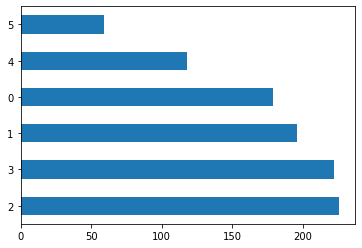

In [ ]:
df['parental level of education'].value_counts().plot(kind='barh')

In [ ]:
X_train, y_train = X[:-200], y[:-200]
X_val, y_val = X[-200:-100], y[-200:-100]
X_test, y_test = X.tail(100),y.tail(100)

In [ ]:
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [ ]:
#calculating a baseline accuracy (for class is .value_counts(normalize=True).max())
#y_bl_pred = [y_train.mean()] * len(y_train)
#print('Mean level of parent education:', y_train.mean())
#print('Baseline MAE:', mean_absolute_error(y_train,y_bl_pred))

In [ ]:
#making a fast first random forest model that beats guessing
#hyper perameter tuning (max depth, n_estimators)
rf_model = make_pipeline(OrdinalEncoder(),
                           RandomForestClassifier(random_state=42, max_depth = 10, n_estimators=75))
#Fitting the logistic regression model
rf_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'race/ethnicity', 'lunch',
                                      'test preparation course'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': female    1
male      2
NaN      -2
dtype: int64},
                                         {'col': 'race/ethnicity',
                                          'data_type': dtype('O'),
                                          'mapping': group B    1
group...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
      

In [ ]:
#predicting "average test scores" with the model
y_pred=rf_model.predict(X_test)
y_pred

array([3, 1, 0, 4, 2, 2, 1, 3, 3, 2, 1, 0, 3, 2, 2, 2, 4, 0, 3, 3, 4, 1,
       0, 2, 1, 0, 1, 2, 0, 0, 3, 2, 0, 4, 2, 2, 2, 2, 3, 0, 3, 2, 3, 2,
       2, 2, 0, 3, 1, 3, 3, 4, 2, 1, 1, 2, 3, 5, 0, 1, 2, 3, 4, 2, 2, 2,
       1, 2, 2, 3, 5, 3, 0, 3, 2, 0, 2, 2, 0, 3, 0, 3, 2, 3, 2, 1, 0, 3,
       0, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2, 2])

In [ ]:
#getting accuracy of the model
score = rf_model.score(X_train,y_train)
score

0.94875

In [ ]:
score1 = rf_model.score(X_test,y_test)
score1

0.31

In [ ]:
importances = rf_model.named_steps['randomforestclassifier'].feature_importances_
features = rf_model.named_steps['ordinalencoder'].get_feature_names()
feat_imp = pd.Series(importances,index=features).sort_values()

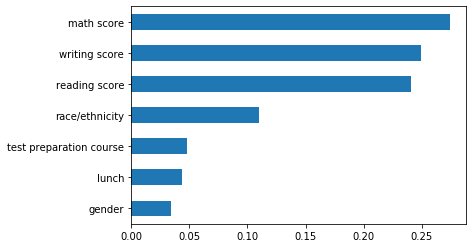

In [ ]:
feat_imp.tail(10).plot(kind='barh')

In [ ]:
param_grid = {
    'randomforestclassifier__max_depth': range(5,35,5),
    'randomforestclassifier__n_estimators': range(25,125,25)}
#doing a randomized search to find the pest hyper parameters for the random forest model
model_rfrs = RandomizedSearchCV(
    rf_model,
    param_distributions = param_grid,
    n_iter = 3,
    cv = None,
    n_jobs = -1,
    verbose = 1
)
model_rfrs.fit(X,y)
#finding the best Testing Accuracy Score for X_test and y_test


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.8s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['gender',
                                                                   'race/ethnicity',
                                                                   'lunch',
                                                                   'test '
                                                                   'preparation '
                                                                   'course'],
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=[{'col': 'gender',
                          

In [ ]:
#finding the pest hyper parameters for the random forest model via the random search
model_rfrs.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 50}

In [ ]:
#best score for the random forest model
model_rfrs.best_score_

0.22400000000000003

In [ ]:
transformer = make_pipeline(
    OrdinalEncoder(),
)
trans_X_train = transformer.fit_transform(X_train,y_train)
model_xgb = XGBClassifier(random_state=42,n_jobs=-1)
model_xgb.fit(trans_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#trying out an xgboost model
model_xgb = make_pipeline(
    OrdinalEncoder(), 
    XGBClassifier(random_state=42,n_jobs=-1)
)

# Fit on train, score on val
model_xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'race/ethnicity', 'lunch',
                                      'test preparation course'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': female    1
male      2
NaN      -2
dtype: int64},
                                         {'col': 'race/ethnicity',
                                          'data_type': dtype('O'),
                                          'mapping': group B    1
group...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
             

In [ ]:
#Training accuracy for model_xgb
model_xgb.score(X_train, y_train)


0.54875

In [ ]:
#Test accuracy for model_xgb which is slightly better than my random forest model!
model_xgb.score(X_test, y_test)

0.28

In [ ]:
perm_imp = permutation_importance(model_xgb,X_test,y_test,random_state=42)

In [ ]:
#calculating permutation importance
data = {'imp_mean':perm_imp['importances_mean'],
        'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data,index=X_test.columns).sort_values(by='imp_mean')

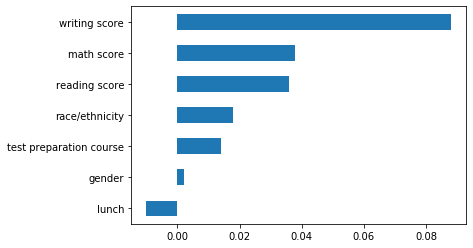

In [ ]:
df_perm['imp_mean'].tail(10).plot(kind='barh')

In [ ]:
df_perm

,imp_mean,imp_std
lunch,-0.010,0.014142
gender,0.002,0.011662
test preparation course,0.014,0.008000
race/ethnicity,0.018,0.021354
reading score,0.036,0.024166
math score,0.038,0.013266
writing score,0.088,0.013266


In [ ]:
def check_metrics(model):
  print(model)
  print('TRaining MAE', mean_absolute_error(y_train,rf_model.predict(X_train)))
  print('Validation MAE', mean_absolute_error(y_val,rf_model.predict(X_val)))
  print('Validation R2', rf_model.score(X_val,y_val))

model = [rf_model]

for m in model:
  check_metrics(m)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'race/ethnicity', 'lunch',
                                      'test preparation course'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': female    1
male      2
NaN      -2
dtype: int64},
                                         {'col': 'race/ethnicity',
                                          'data_type': dtype('O'),
                                          'mapping': group B    1
group...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
      

In [ ]:
X_val.columns

(<Figure size 1080x1620 with 7 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7fd0122ff110>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd0c9898390>})

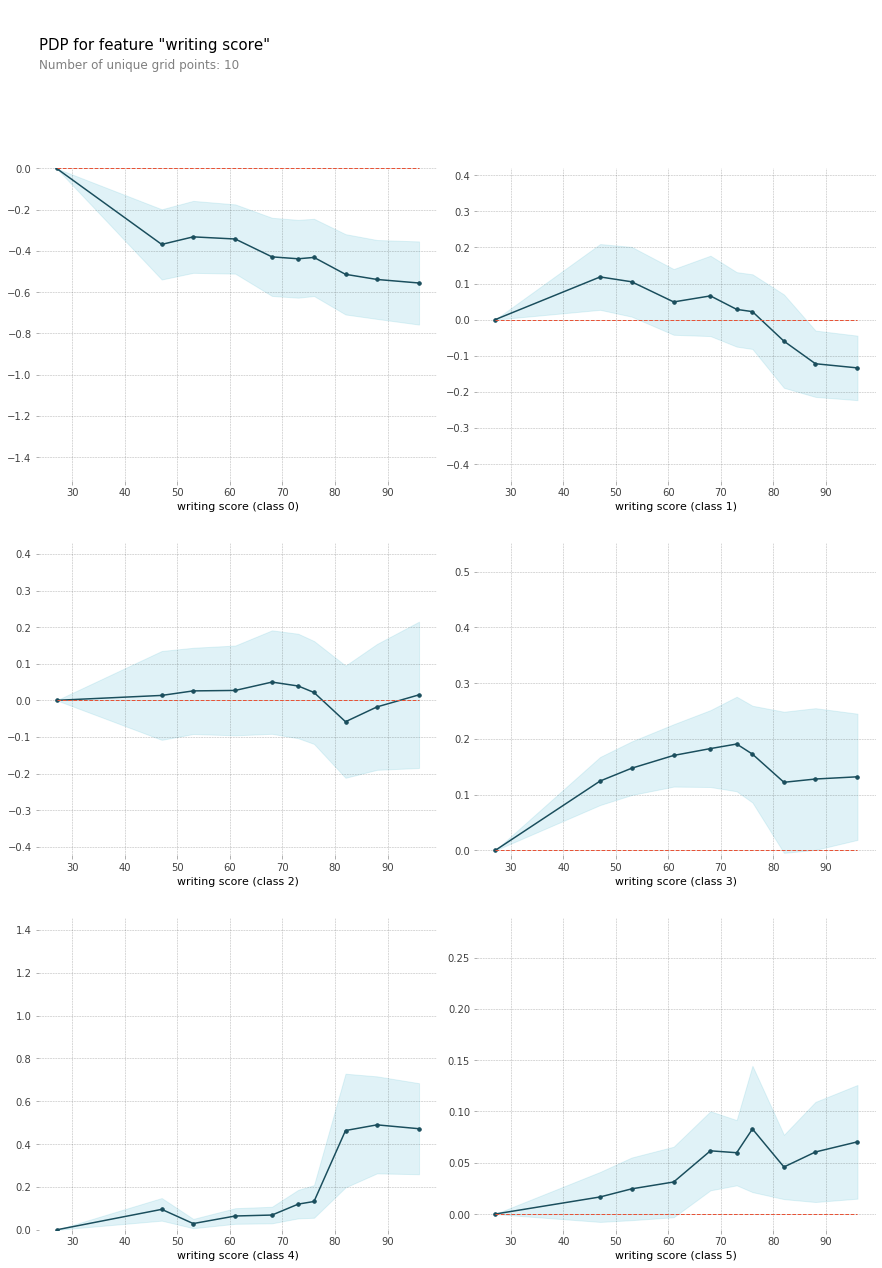

In [ ]:
isolate = pdp_isolate(model_xgb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = 'writing score')

pdp_plot(isolate,feature_name = 'writing score')

(<Figure size 1080x1620 with 7 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7fd01200e0d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd01233d090>})

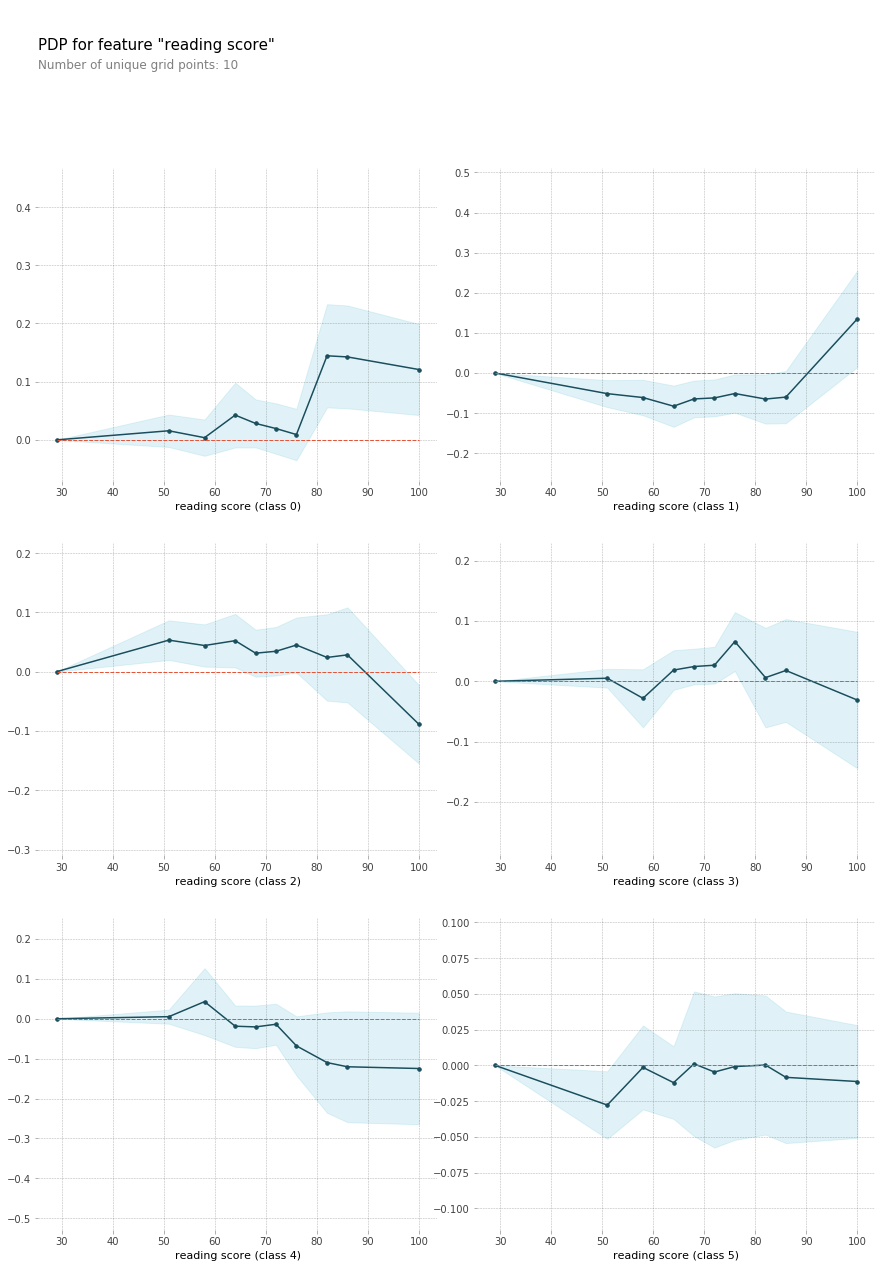

In [ ]:
isolate = pdp_isolate(model_xgb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = 'reading score')

pdp_plot(isolate,feature_name = 'reading score')

(<Figure size 1080x1620 with 7 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7fd011cc62d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd01200ea10>})

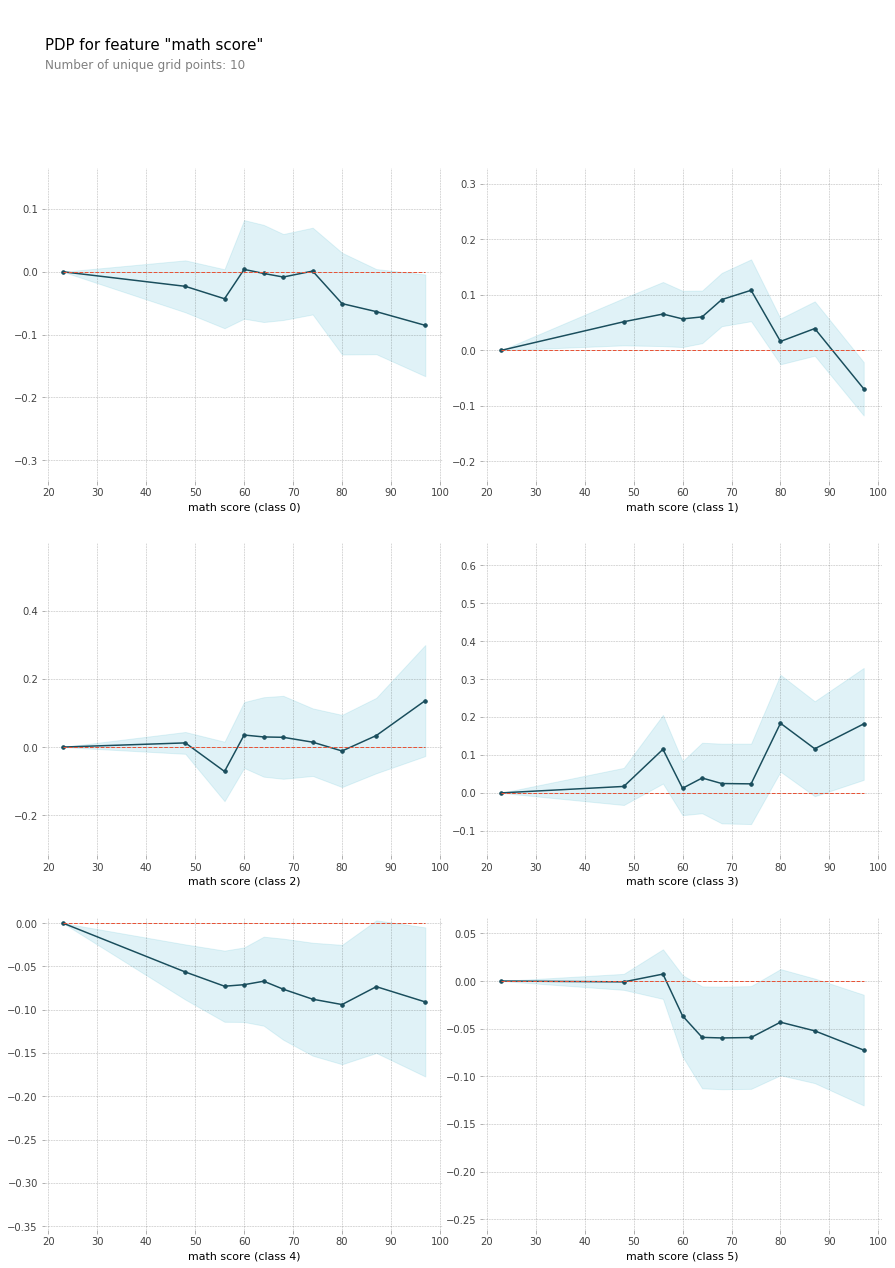

In [ ]:
isolate = pdp_isolate(model_xgb,
                      dataset = X_val,
                      model_features = X_val.columns,
                      feature = 'math score')

pdp_plot(isolate,feature_name = 'math score')

In [ ]:
sample = X_train.head(25)

In [ ]:
transformer.fit_transform(X_val)

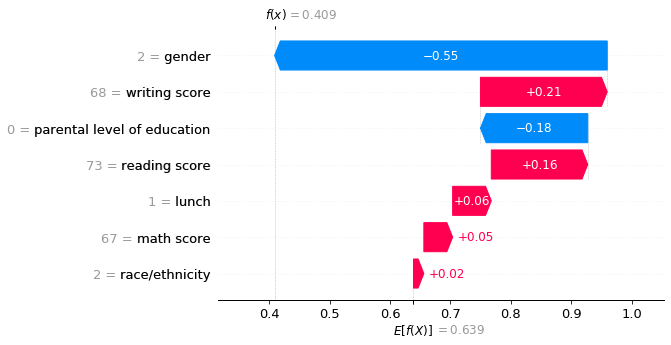

In [ ]:
explainer = shap.TreeExplainer(model_xgb)
shap_values=explainer(transformer.fit_transform(X_val))
shap.initjs()
shap.plots.waterfall(shap_values[0])
